In [1]:
import matplotlib.pyplot as plt
import json
import skimage.io as io
import matplotlib.pyplot as plt
import os
import random
import numpy as np
from collections import Counter

In [ ]:
p1 = 'orig_data/vqa_v2.0/v2_OpenEnded_mscoco_test2015_questions.json'
#p2 = '/home/btp/pg_aa_1/pythia/test_best_model.json'
p2 = '/home1/BTP/pg_aa_1/btp/results/pythia_cycle_consistent/29/best_model_predict_test.json'

res = json.load(open(p2,'r'))
ques = json.load(open(p1,'r'))

In [ ]:
qqa = {}
for q in ques['questions']:
    qqa[q['question_id']] = q

In [ ]:
indices = random.choices(range(0,len(res)),k=50)


In [ ]:
for i in indices:
    r = res[i]
    q_id = r['question_id']
    ans = r['answer']
    question = qqa[q_id]['question']
    imgId = qqa[q_id]['image_id']
    imgFilename = 'orig_data/vqa_v2.0/test2015/' + 'COCO_test2015_'+ str(imgId).zfill(12) + '.jpg'
    
    if os.path.isfile(imgFilename):
        I = io.imread(imgFilename)
        plt.imshow(I)
        plt.axis('off')
        plt.show()
    print(question)
    print(ans)

# Generated Questions

In [10]:
import numpy
gq_1 = numpy.load("/home1/BTP/pg_aa_1/btp/boards/pythia_cycle_consistent/3012/gq_25000.npy", allow_pickle=True)
gq = gq_1.item()

In [15]:
import random
indices = random.choices(range(len(gq['annotations'])), k=100)

['how',
 'many',
 'sources',
 'of',
 'light',
 'are',
 'there',
 '<unk>',
 '<unk>',
 '<unk>',
 '<unk>',
 '<unk>',
 '<unk>',
 '<unk>']

7

In [80]:
for i in indices :
# for i in range(len(gq['annotations'])):
    entry = gq['annotations'][i]
    ia = entry['imp_ans']
    oa = gq['ques_answers'][i]['orig_ans']
    if oa == ia:
        continue
    q = entry['gen_ques']
    q = q.replace('<start>', '')
    q = q.replace('<unk>', '')
    q = q.replace('<end>', '')
    q = q.strip()
    oq = gq['ques_answers'][i]['orig_ques']
    if '<end>' in oq:
        oq = oq[:oq.index("<end>")]
    oq = oq.replace('<start>', '')
    oq = oq.replace('<unk>', '')
    oq = oq.replace('<end>', '')
    oq = oq.strip()
    if(len(oq.split()) > 4):
        continue
    qgt = entry['gt_gen_ques']
#     if '<end>' in qgt:
#         qgt = qgt[:qgt.index("<end>")]
    qgt = qgt.replace('<start>', '')
    qgt = qgt.replace('<unk>', '')
    qgt = qgt.replace('<end>', '')
    qgt = qgt.strip()
    imgId = entry['image_id']
    imgFilename = 'orig_data/vqa_v2.0/val2014/' + 'COCO_val2014_'+ str(imgId).zfill(12) + '.jpg'
    
    if os.path.isfile(imgFilename):
        I = io.imread(imgFilename)
        plt.imshow(I)
        plt.axis('off')
        plt.show()
    print("Original ques : " + oq)
    print("Original Answer : " + oa)
    print("Implied Answer : " + ia)
    print("Generated ques : " + q)
    print("Ground Truth Implication : " + qgt)

NameError: name 'indices' is not defined

In [15]:
from nltk.translate.bleu_score import sentence_bleu
score_1 = 0
score_2 = 0
score_3 = 0
score_4 = 0
count = 0
for i in range(len(gq['annotations'])):
    oa = gq['ques_answers'][i]['orig_ans']
    entry = gq['annotations'][i]
    ia = entry['imp_ans']
    if oa == 'yes' or oa == 'no':
        continue
    if ia != 'yes' and ia != 'no':
        continue
    q = entry['gen_ques']
    if '<end>' in q:
        q = q[:q.index("<end>")]
    q = q.replace('<start>', '')
    q = q.replace('<unk>', '')
    q = q.replace('<end>', '')
    q = q.replace('!', '')
    q = q.strip()
    qgt = entry['gt_gen_ques']
    qgt = qgt.replace('<start>', '')
    qgt = qgt.replace('<unk>', '')
    qgt = qgt.replace('<end>', '')
    qgt = qgt.replace('!', '')
    qgt = qgt.strip()
    score_1 += sentence_bleu([qgt.split()], q.split(), weights=(1,0,0,0))
    score_2 += sentence_bleu([qgt.split()], q.split(), weights=(0.5,0.5,0,0))
    score_3 += sentence_bleu([qgt.split()], q.split(), weights=(0.33,0.33,0.33,0))
    score_4 += sentence_bleu([qgt.split()], q.split(), weights=(0.25,0.25,0.25,0.25))
    count += 1
    
score_1 /= count
score_2 /= count
score_3 /= count
score_4 /= count
print("The bleu-1 score is: "+str(score_1))
print("The bleu-2 score is: "+str(score_2))
print("The bleu-3 score is: "+str(score_3))
print("The bleu-4 score is: "+str(score_4))

/opt/anaconda3/lib/python3.7/site-packages/nltk/translate/bleu_score.py:523: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/opt/anaconda3/lib/python3.7/site-packages/nltk/translate/bleu_score.py:523: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/opt/anaconda3/lib/python3.7/site-packages/nltk/translate/bleu_score.py:523: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnin

The bleu-1 score is: 0.7127741304049194
The bleu-2 score is: 0.6402352375461843
The bleu-3 score is: 0.5403273364643447
The bleu-4 score is: 0.40583196873568644


In [9]:
import numpy
gq_gt_1 = numpy.load("/home1/BTP/pg_aa_1/btp/boards/pythia_cycle_consistent/3009/gq_25000.npy", allow_pickle=True)
gq_gt = gq_gt_1.item()

In [ ]:
temp = gq_gt['annotations'][11]['gen_ques']
temp

In [10]:
from nltk.translate.bleu_score import sentence_bleu
score_1 = 0
score_2 = 0
score_3 = 0
score_4 = 0
count = 0
for i in range(len(gq_gt['annotations'])):
    oa = gq_gt['ques_answers'][i]['orig_ans']
    entry = gq_gt['annotations'][i]
    ia = entry['imp_ans']
    if oa == 'yes' or oa == 'no':
        continue
    if ia != 'yes' and ia != 'no':
        continue
    q = entry['gen_ques']
    if '<end>' in q:
        q = q[:q.index("<end>")]
    q = q.replace('<start>', '')
    q = q.replace('<unk>', '')
    q = q.replace('<end>', '')
    q = q.replace('!', '')
    q = q.strip()
    qgt = entry['gt_gen_ques']
    qgt = qgt.replace('<start>', '')
    qgt = qgt.replace('<unk>', '')
    qgt = qgt.replace('<end>', '')
    qgt = qgt.replace('!', '')
    qgt = qgt.strip()
    score_1 += sentence_bleu([qgt.split()], q.split(), weights=(1,0,0,0))
    score_2 += sentence_bleu([qgt.split()], q.split(), weights=(0.5,0.5,0,0))
    score_3 += sentence_bleu([qgt.split()], q.split(), weights=(0.33,0.33,0.33,0))
    score_4 += sentence_bleu([qgt.split()], q.split(), weights=(0.25,0.25,0.25,0.25))
    count += 1
    
score_1 /= count
score_2 /= count
score_3 /= count
score_4 /= count
print("The bleu-1 score is: "+str(score_1))
print("The bleu-2 score is: "+str(score_2))
print("The bleu-3 score is: "+str(score_3))
print("The bleu-4 score is: "+str(score_4))

/opt/anaconda3/lib/python3.7/site-packages/nltk/translate/bleu_score.py:523: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/opt/anaconda3/lib/python3.7/site-packages/nltk/translate/bleu_score.py:523: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/opt/anaconda3/lib/python3.7/site-packages/nltk/translate/bleu_score.py:523: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnin

The bleu-1 score is: 0.753129973729357
The bleu-2 score is: 0.6905358886634695
The bleu-3 score is: 0.6060766515607181
The bleu-4 score is: 0.48953548617353654


# Final score calculation

In [2]:
imdb = np.load("/home1/BTP/pg_aa_1/btp/data/imdb_imps/imdb_val2014.npy", allow_pickle=True)

In [66]:
imdb[10]

{'image_name': 'COCO_val2014_000000262162',
 'image_id': 262162,
 'question_id': 262162009,
 'feature_path': 'COCO_val2014_000000262162.npy',
 'question_str': 'What is the chair made of?',
 'question_tokens': ['what', 'is', 'the', 'chair', 'made', 'of'],
 'all_answers': ['leather',
  'leather',
  'plastic',
  'plastic, vinyl, metal',
  'leather',
  'leather',
  'leather',
  'leather',
  'leather',
  'leather'],
 'valid_answers': ['leather',
  'leather',
  'plastic',
  'leather',
  'leather',
  'leather',
  'leather',
  'leather',
  'leather'],
 'is_imps': True,
 'qa_tokens': {'leather': [['is', 'the', 'chair', 'made', 'of', 'leather'],
   ['is', 'there', 'a', 'leather', 'in', 'the', 'picture']],
  'plastic': [['is', 'the', 'chair', 'made', 'of', 'plastic'],
   ['is', 'the', 'chair', 'made', 'of', 'glass'],
   ['is', 'there', 'a', 'plastic', 'in', 'the', 'picture']]},
 'qa_answers': {'leather': ['yes', 'yes'], 'plastic': ['yes', 'no', 'yes']},
 'imp_type': {'leather': [[1, 0, 0], [0, 1,

In [71]:
gq_1 = np.load("/home1/BTP/pg_aa_1/btp/boards/pythia_cycle_consistent/3014/gq_70000.npy", allow_pickle=True)
gq_2 = np.load("/home1/BTP/pg_aa_1/btp/boards/pythia_cycle_consistent/3014/gq_70001.npy", allow_pickle=True)
gq_3 = np.load("/home1/BTP/pg_aa_1/btp/boards/pythia_cycle_consistent/3014/gq_70002.npy", allow_pickle=True)
gq_1 = gq_1.item()
gq_2 = gq_2.item()
gq_3 = gq_3.item()

In [9]:
m = {}
for i in range(1,len(imdb)):
    m[imdb[i]['question_id']] = i

In [72]:
for i in range(len(gq_1['annotations'])):
    assert gq_3['annotations'][i]['ques_id'] == imdb[i+1]['question_id']
    assert gq_1['ques_answers'][i]['orig_ans'] == gq_2['ques_answers'][i]['orig_ans']
    assert gq_2['ques_answers'][i]['orig_ans'] == gq_3['ques_answers'][i]['orig_ans']

In [54]:
from pycocoevalcap.cider.cider_scorer import CiderScorer
qgtr = " ".join(qgt)
cider_scorer = CiderScorer()
cider_scorer += (q, qgt)
cider_scorer.compute_score()
max(1,2)

2

In [89]:
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.meteor_score import single_meteor_score
from rouge import Rouge
from pycocoevalcap.cider.cider_scorer import CiderScorer
score_1 = 0
score_2 = 0
score_3 = 0
score_4 = 0
score_r = 0
score_m = 0
count = 0
score_max = 0
good_list = []
ok_list = []
bad_list = []
yes_no_list = []
cider_scorer_1 = CiderScorer()
# file1 = open("hypotheses_3014.txt", "w")
# file2 = open("references_3014.txt", "w")
for i in range(1, len(imdb)):
    if not imdb[i]['is_imps']:
        continue
    chosen_ans = gq_1['ques_answers'][i-1]['orig_ans']
    num_imps = len(imdb[i]['imp_type'][chosen_ans])
    c = 0
    if(chosen_ans != 'yes' or chosen_ans != 'no'):
        continue:
    if(num_imps != 3):
        continue
    for j in range(num_imps):
        imp_type = np.argmax(imdb[i]['imp_type'][chosen_ans][j]) + 1
        if imp_type == 1:
            gq = gq_1
        elif imp_type == 2:
            gq = gq_2
        else:
            gq = gq_3
        assert gq['annotations'][i-1]['ques_id'] == imdb[i]['question_id']
        q = gq['annotations'][i-1]['gen_ques']
        if '<end>' in q:
            q = q[:q.index("<end>")]
        q = q.replace('<start>', '')
        q = q.replace('<unk>', '')
        q = q.replace('<end>', '')
        q = q.strip()
        qgt = imdb[i]['qa_tokens'][chosen_ans][j]
        rouge = Rouge()
        qgtr = " ".join(qgt)
#         file1.write(q+" \n")
#         file2.write(qgtr+" \n")
#         score_1 += sentence_bleu([qgt], q.split(), weights=(1,0,0,0))
#         score_2 += sentence_bleu([qgt], q.split(), weights=(0.5,0.5,0,0))
#         score_3 += sentence_bleu([qgt], q.split(), weights=(0.33,0.33,0.33,0))
        score = sentence_bleu([qgt], q.split(), weights=(0.25,0.25,0.25,0.25))
#         if(score < 0.1):
        c+=1
#         score_m += single_meteor_score(qgtr, q)
#         score_r += rouge.get_scores(q, qgtr)[0]['rouge-l']['f']
#         cider_scorer_1 += (q, qgt)
        count += 1
    if c==3:
#         good_list.append(i-1)
#         ok_list.append(i-1)
#         bad_list.append(i-1)
        yes_no_list.append(i-1)
        
    
score_1 /= count
score_2 /= count
score_3 /= count
score_4 /= count
score_m /= count
score_r /= count
print("Count: "+str(count))
print("The bleu-1 score is: "+str(score_1))
print("The bleu-2 score is: "+str(score_2))
print("The bleu-3 score is: "+str(score_3))
print("The bleu-4 score is: "+str(score_4))
print("The ROUGE-L score is: "+str(score_r))
print("The METEOR score is: "+str(score_m))
print("Max BLEU-4 score is: " + str(score_max))
# print(cider_scorer_1.compute_score())
# file1.close()
# file2.close()

Count: 162459
The bleu-1 score is: 0.0
The bleu-2 score is: 0.0
The bleu-3 score is: 0.0
The bleu-4 score is: 0.0
The ROUGE-L score is: 0.0
The METEOR score is: 0.0
Max BLEU-4 score is: 0


In [81]:
print(len(good_list))
import random
indices = random.choices(good_list, k=50)

15320


[135866,
 145209,
 115918,
 12862,
 194541,
 206284,
 168875,
 200302,
 145566,
 57622,
 94870,
 40227,
 192506,
 57772,
 117340,
 195095,
 198430,
 192336,
 194559,
 122849,
 8145,
 73983,
 99390,
 150045,
 14291,
 22960,
 173460,
 87691,
 20948,
 207041,
 34654,
 105016,
 16200,
 136124,
 161315,
 86548,
 139494,
 126979,
 151414,
 96431,
 105039,
 67456,
 145468,
 107092,
 71181,
 67547,
 192181,
 2727,
 34675,
 141948]

In [87]:
print(len(ok_list))
import random
indices_ok = random.sample(ok_list, k=50)
indices_ok

106


[123908,
 31737,
 75107,
 87667,
 162559,
 105282,
 124056,
 113036,
 100389,
 171038,
 45752,
 66043,
 163026,
 71353,
 206458,
 166515,
 177613,
 181832,
 44232,
 104399,
 199718,
 22482,
 3453,
 14330,
 54557,
 91125,
 108646,
 209821,
 9132,
 9563,
 181167,
 176035,
 104524,
 198240,
 31806,
 119413,
 82824,
 40652,
 54687,
 50222,
 22515,
 174193,
 60794,
 155715,
 107937,
 135628,
 64280,
 31380,
 58396,
 48106]

In [90]:
print(len(bad_list))
import random
indices_bad = random.sample(bad_list, k=50)
indices_bad

12465


[95449,
 84104,
 68940,
 197833,
 23765,
 86234,
 759,
 200168,
 12755,
 206480,
 71564,
 150661,
 126803,
 150502,
 29819,
 103904,
 91949,
 13438,
 138107,
 99648,
 30096,
 134106,
 169195,
 18324,
 86559,
 51728,
 174585,
 151876,
 165470,
 186389,
 165498,
 158027,
 23438,
 196962,
 24574,
 129238,
 127891,
 163320,
 53302,
 206723,
 130330,
 114263,
 127057,
 181885,
 126801,
 180428,
 121893,
 182625,
 183634,
 15415]

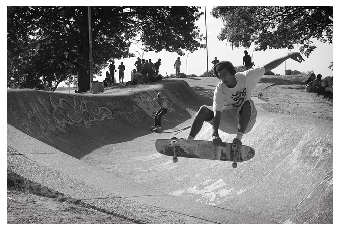

Image: orig_data/vqa_v2.0/val2014/COCO_val2014_000000154154.jpg
Original ques : How many body parts are touching the skateboard?
Original Answer : 3
Generated Logeq ques : are 3 fingers touching the handle  on the board
Generated Nec ques : are any fingers touching the handle of the surfboard
Generated Mutex ques : are 3 fingers touching the handle of the keyboard


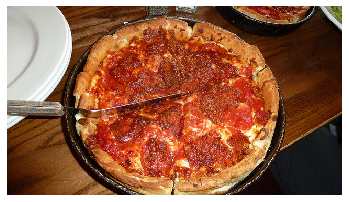

Image: orig_data/vqa_v2.0/val2014/COCO_val2014_000000024197.jpg
Original ques : How many servings will this food item provide?
Original Answer : 6
Generated Logeq ques : does this pizza feed to make 2 people
Generated Nec ques : does this pizza have any people to eat
Generated Mutex ques : does this pizza feed to make 3 people


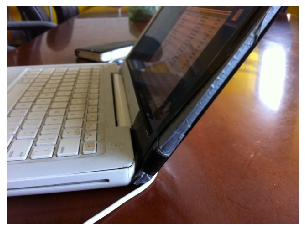

Image: orig_data/vqa_v2.0/val2014/COCO_val2014_000000526368.jpg
Original ques : How many cords are on the laptop?
Original Answer : 1
Generated Logeq ques : are 4 buttons on the keyboard
Generated Nec ques : are any buttons on the keyboard
Generated Mutex ques : are 3 buttons on the keyboard


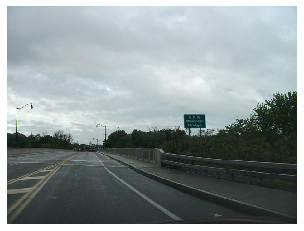

Image: orig_data/vqa_v2.0/val2014/COCO_val2014_000000246348.jpg
Original ques : How many utility light poles are pictured?
Original Answer : 2
Generated Logeq ques : can 2 poles poles be seen
Generated Nec ques : can any light poles be seen
Generated Mutex ques : can 3 light poles be seen


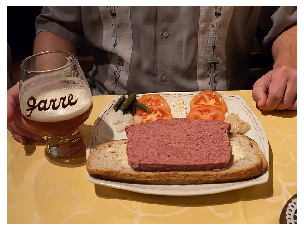

Image: orig_data/vqa_v2.0/val2014/COCO_val2014_000000568426.jpg
Original ques : What color is his shirt?
Original Answer : gray
Generated Logeq ques : is his shirt brown
Generated Nec ques : is there anything brown in the picture
Generated Mutex ques : is his shirt pink


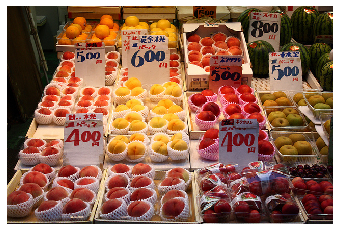

Image: orig_data/vqa_v2.0/val2014/COCO_val2014_000000146917.jpg
Original ques : What kind of food is this?
Original Answer : fruit
Generated Logeq ques : is this a salad
Generated Nec ques : is there a banana in the picture
Generated Mutex ques : is this a buffet


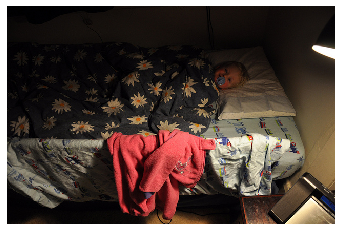

Image: orig_data/vqa_v2.0/val2014/COCO_val2014_000000525369.jpg
Original ques : How many toys are on the kid bed?
Original Answer : 0
Generated Logeq ques : is 1 bed on the bed
Generated Nec ques : are any toys on the bed
Generated Mutex ques : are 2 toys on the bed


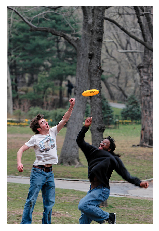

Image: orig_data/vqa_v2.0/val2014/COCO_val2014_000000117424.jpg
Original ques : What color is the Frisbee?
Original Answer : yellow
Generated Logeq ques : is the frisbee orange
Generated Nec ques : is there anything orange in the picture
Generated Mutex ques : is the frisbee blue


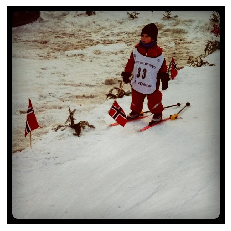

Image: orig_data/vqa_v2.0/val2014/COCO_val2014_000000113233.jpg
Original ques : What is that red and white thing in the back?
Original Answer : flag
Generated Logeq ques : is the red object in the back jacket
Generated Nec ques : is there a fire hydrant in the picture
Generated Mutex ques : is the red object in the back of the photo car


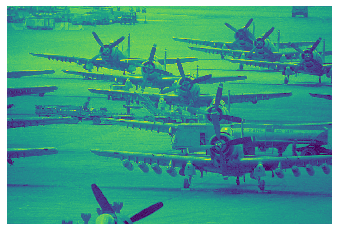

Image: orig_data/vqa_v2.0/val2014/COCO_val2014_000000385625.jpg
Original ques : How many objects are on the wings of the plane pictured right?
Original Answer : 8
Generated Logeq ques : are 3 people visible on the tail of the plane
Generated Nec ques : are any items on the tail of the plane
Generated Mutex ques : are 3 people visible on the tail of the plane


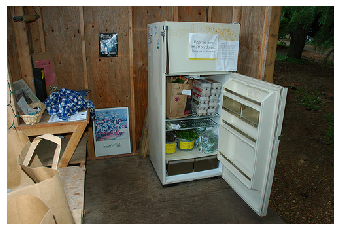

Image: orig_data/vqa_v2.0/val2014/COCO_val2014_000000397322.jpg
Original ques : How many cartons of eggs are in the refrigerator?
Original Answer : 10
Generated Logeq ques : are 2 rolls of toilet paper in the bathroom
Generated Nec ques : are any rolls of toilet paper in the box
Generated Mutex ques : are 3 rolls of toilet paper in the bathroom


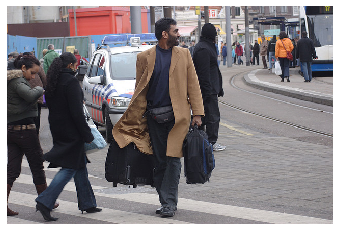

Image: orig_data/vqa_v2.0/val2014/COCO_val2014_000000200668.jpg
Original ques : What color coat is the man wearing?
Original Answer : brown
Generated Logeq ques : is the person wearing black
Generated Nec ques : is there anything black in the picture
Generated Mutex ques : is the person wearing white


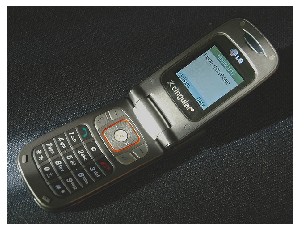

Image: orig_data/vqa_v2.0/val2014/COCO_val2014_000000441577.jpg
Original ques : How many pieces are the phone?
Original Answer : 2
Generated Logeq ques : are there 2 the phone
Generated Nec ques : are there any cell phones
Generated Mutex ques : are there 3 the phone


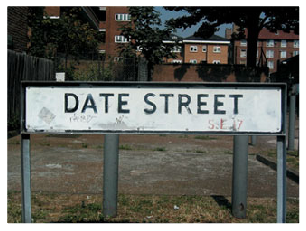

Image: orig_data/vqa_v2.0/val2014/COCO_val2014_000000331600.jpg
Original ques : What color is the metal gate?
Original Answer : gray
Generated Logeq ques : is the gate silver
Generated Nec ques : is there anything red in the picture
Generated Mutex ques : is the gate frame black


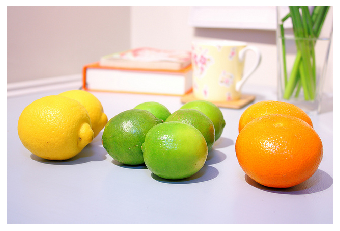

Image: orig_data/vqa_v2.0/val2014/COCO_val2014_000000448854.jpg
Original ques : How many limes do you see in this picture?
Original Answer : 5
Generated Logeq ques : can you see 2 chimneys
Generated Nec ques : can you see any chimneys
Generated Mutex ques : can you see 4 chimneys


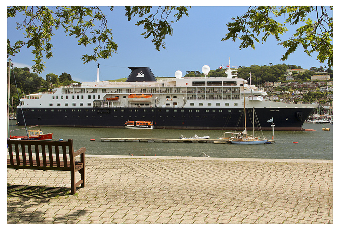

Image: orig_data/vqa_v2.0/val2014/COCO_val2014_000000160927.jpg
Original ques : Do the tiles make both curved and straight patterns?
Original Answer : yes
Generated Logeq ques : do the plates make up
Generated Nec ques : do the lines have lines  on the ground
Generated Mutex ques : do the lines lines lines


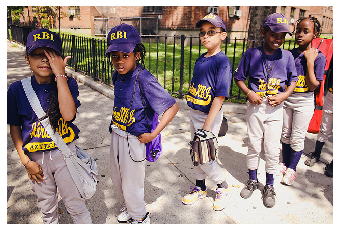

Image: orig_data/vqa_v2.0/val2014/COCO_val2014_000000151441.jpg
Original ques : What color is the picture?
Original Answer : purple
Generated Logeq ques : is the picture black and white
Generated Nec ques : is there anything black in the picture
Generated Mutex ques : is the picture black


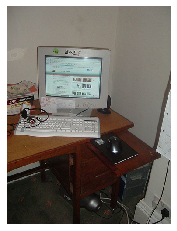

Image: orig_data/vqa_v2.0/val2014/COCO_val2014_000000156474.jpg
Original ques : How many screens are seen here?
Original Answer : 1
Generated Logeq ques : is 1 computer screens in this picture
Generated Nec ques : are any screens present
Generated Mutex ques : are 2 screens present


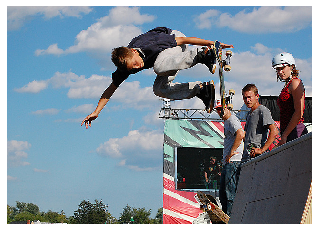

Image: orig_data/vqa_v2.0/val2014/COCO_val2014_000000057286.jpg
Original ques : How many skaters have helmets?
Original Answer : 1
Generated Logeq ques : do 2 players have helmets
Generated Nec ques : do any players have helmets
Generated Mutex ques : do 3 players have helmets


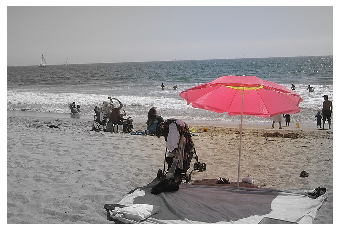

Image: orig_data/vqa_v2.0/val2014/COCO_val2014_000000026430.jpg
Original ques : How many strollers are on the beach?
Original Answer : 1
Generated Logeq ques : are 2 benches in the park
Generated Nec ques : are any benches in the park
Generated Mutex ques : are 3 benches in the park


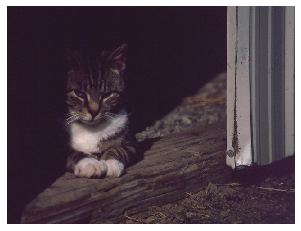

Image: orig_data/vqa_v2.0/val2014/COCO_val2014_000000056373.jpg
Original ques : What color is the cats?
Original Answer : brown
Generated Logeq ques : is the cats gray
Generated Nec ques : is there anything gray in the picture
Generated Mutex ques : is the cats black


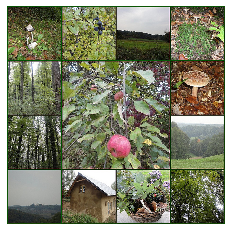

Image: orig_data/vqa_v2.0/val2014/COCO_val2014_000000316240.jpg
Original ques : How many pic squares in this mosaic?
Original Answer : 16
Generated Logeq ques : is this image on this building 4 floors
Generated Nec ques : are any stories this type of this building on the walls
Generated Mutex ques : is this 4 stories on this building


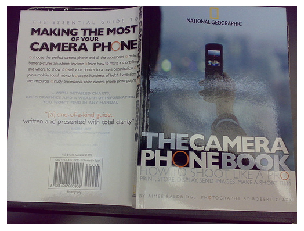

Image: orig_data/vqa_v2.0/val2014/COCO_val2014_000000087638.jpg
Original ques : How many pages are in this book?
Original Answer : 200
Generated Logeq ques : are there 4 books in this photo
Generated Nec ques : are any books in this sign
Generated Mutex ques : are 4 books in this sign


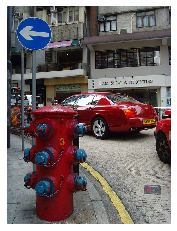

Image: orig_data/vqa_v2.0/val2014/COCO_val2014_000000559166.jpg
Original ques : What does the warning sign say?
Original Answer : turn
Generated Logeq ques : does the sign say stop
Generated Nec ques : is there a stop in the picture
Generated Mutex ques : does the sign say stop


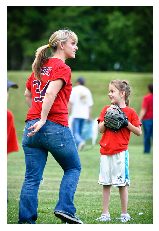

Image: orig_data/vqa_v2.0/val2014/COCO_val2014_000000409291.jpg
Original ques : What color are angel's number written in?
Original Answer : black
Generated Logeq ques : is the number written in blue
Generated Nec ques : is there anything white in the picture
Generated Mutex ques : is the number written in black


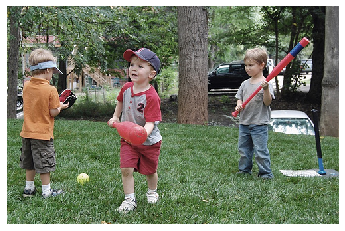

Image: orig_data/vqa_v2.0/val2014/COCO_val2014_000000232160.jpg
Original ques : How many children are wearing visors?
Original Answer : 1
Generated Logeq ques : is 1 kid wearing glasses
Generated Nec ques : are any kids wearing helmets
Generated Mutex ques : are 2 kids wearing helmets


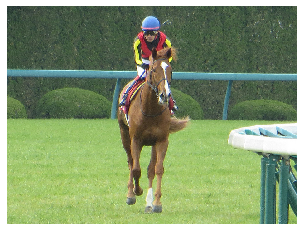

Image: orig_data/vqa_v2.0/val2014/COCO_val2014_000000486171.jpg
Original ques : How many shrubs are in the background?
Original Answer : 4
Generated Logeq ques : are 4 trees in the background
Generated Nec ques : are any trees in the background
Generated Mutex ques : are 4 trees in the background


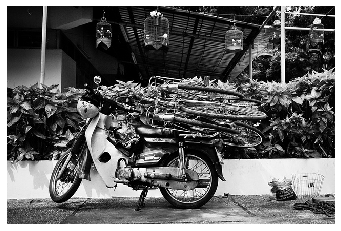

Image: orig_data/vqa_v2.0/val2014/COCO_val2014_000000070774.jpg
Original ques : How many cages are hanging?
Original Answer : 3
Generated Logeq ques : are 2 hanging hanging above
Generated Nec ques : are any hanging hanging above
Generated Mutex ques : are 3 hanging hanging above


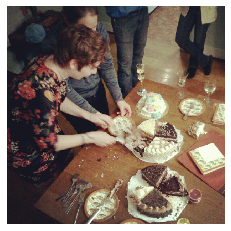

Image: orig_data/vqa_v2.0/val2014/COCO_val2014_000000346089.jpg
Original ques : How many slices of cake have chocolate?
Original Answer : 4
Generated Logeq ques : have 2 doughnuts been cake
Generated Nec ques : have any doughnuts been cake
Generated Mutex ques : have 2 doughnuts been cake


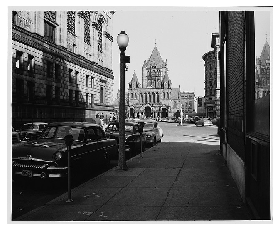

Image: orig_data/vqa_v2.0/val2014/COCO_val2014_000000235380.jpg
Original ques : How many cars are parked in the shade?
Original Answer : 3
Generated Logeq ques : are 4 trees in the shade
Generated Nec ques : are any trees in the shade
Generated Mutex ques : are 4 trees in the shade       in


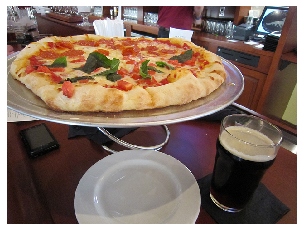

Image: orig_data/vqa_v2.0/val2014/COCO_val2014_000000477195.jpg
Original ques : What color is the napkin?
Original Answer : black
Generated Logeq ques : is the napkin white
Generated Nec ques : is there anything white in the picture
Generated Mutex ques : is the napkin black


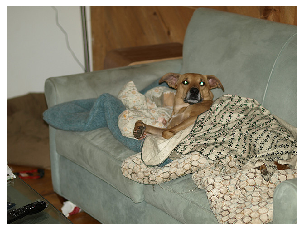

Image: orig_data/vqa_v2.0/val2014/COCO_val2014_000000338901.jpg
Original ques : What color is the sofa?
Original Answer : gray
Generated Logeq ques : is the sofa blue
Generated Nec ques : is there anything blue in the picture
Generated Mutex ques : is the sofa orange


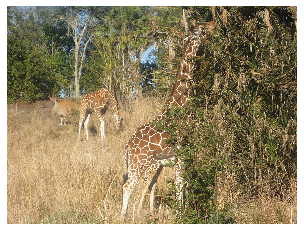

Image: orig_data/vqa_v2.0/val2014/COCO_val2014_000000305821.jpg
Original ques : Does this region have a lower annual rainfall, most likely, than say, Oregon, USA?
Original Answer : yes
Generated Logeq ques : does this look like the same of the baseball player in the city
Generated Nec ques : does this look like a bad at his angeles
Generated Mutex ques : does this look like the same - - - - - - -


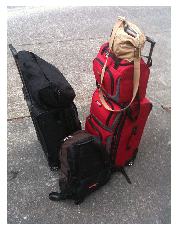

Image: orig_data/vqa_v2.0/val2014/COCO_val2014_000000114479.jpg
Original ques : What color is the purse?
Original Answer : tan
Generated Logeq ques : is the purse brown
Generated Nec ques : is there anything brown in the picture
Generated Mutex ques : is the purse pink


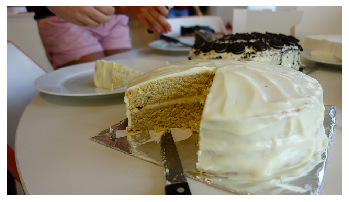

Image: orig_data/vqa_v2.0/val2014/COCO_val2014_000000438788.jpg
Original ques : How many pillows are on the chair?
Original Answer : 0
Generated Logeq ques : are 2 pillows on the couch
Generated Nec ques : are any pillows on the couch
Generated Mutex ques : are 3 pillows on the couch


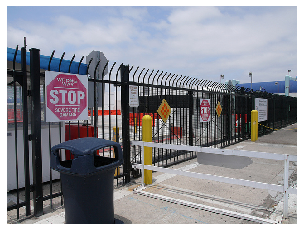

Image: orig_data/vqa_v2.0/val2014/COCO_val2014_000000050360.jpg
Original ques : What color are the posts?
Original Answer : yellow
Generated Logeq ques : are the post yellow
Generated Nec ques : is there anything green in the picture
Generated Mutex ques : are the poles black


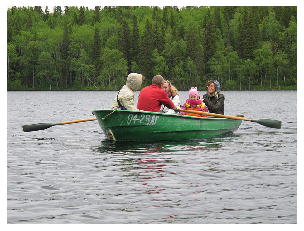

Image: orig_data/vqa_v2.0/val2014/COCO_val2014_000000311327.jpg
Original ques : How many people appear to be wearing life jackets?
Original Answer : 1
Generated Logeq ques : are 2 people wearing clothing in this photo  on the bed
Generated Nec ques : are any people wearing clothing in this photo
Generated Mutex ques : are 3 people wearing a suit on this group


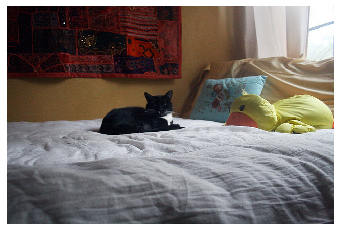

Image: orig_data/vqa_v2.0/val2014/COCO_val2014_000000082042.jpg
Original ques : What stuffed animal is laying near the cat?
Original Answer : duck
Generated Logeq ques : is the cat laying next to the cat
Generated Nec ques : is there a dog in the picture
Generated Mutex ques : is the cat laying next to the cat


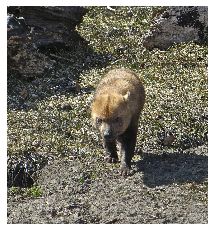

Image: orig_data/vqa_v2.0/val2014/COCO_val2014_000000366508.jpg
Original ques : How many toes are shown?
Original Answer : 8
Generated Logeq ques : are 0 toes showing
Generated Nec ques : are any fingers showing
Generated Mutex ques : are 5 fingers showing


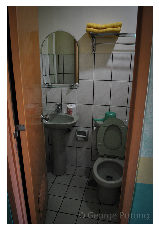

Image: orig_data/vqa_v2.0/val2014/COCO_val2014_000000254750.jpg
Original ques : What color is the toilet?
Original Answer : green
Generated Logeq ques : is the toilet white
Generated Nec ques : is there anything white in the picture
Generated Mutex ques : is the toilet black


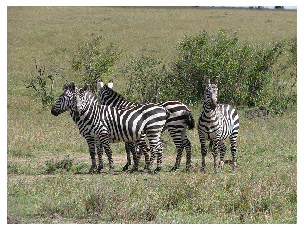

Image: orig_data/vqa_v2.0/val2014/COCO_val2014_000000182240.jpg
Original ques : How many stripes does the one in the middle have?
Original Answer : 30
Generated Logeq ques : does the yellow shirt have in the middle 3
Generated Nec ques : does the yellow shirt have any stripes  in the middle
Generated Mutex ques : does the kite have in the middle 3 stripes


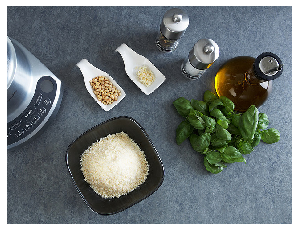

Image: orig_data/vqa_v2.0/val2014/COCO_val2014_000000300233.jpg
Original ques : What color is the table?
Original Answer : gray
Generated Logeq ques : is the table black
Generated Nec ques : is there anything black in the picture
Generated Mutex ques : is the table white


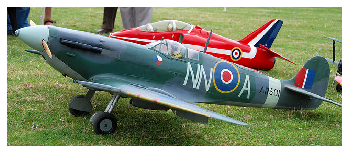

Image: orig_data/vqa_v2.0/val2014/COCO_val2014_000000441752.jpg
Original ques : How can you tell these are not full size planes?
Original Answer : yes
Generated Logeq ques : do you see the large large numbers of numbers < unk >
Generated Nec ques : is there a fire in the picture
Generated Mutex ques : do you see the large planes for numbers


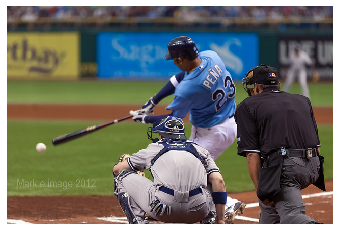

Image: orig_data/vqa_v2.0/val2014/COCO_val2014_000000492840.jpg
Original ques : What color is the number outlined in?
Original Answer : white
Generated Logeq ques : is the sign being held in yellow
Generated Nec ques : is there anything yellow in the picture
Generated Mutex ques : is the sign in black


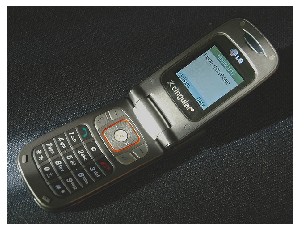

Image: orig_data/vqa_v2.0/val2014/COCO_val2014_000000441577.jpg
Original ques : How many buttons are on this cell phone dial pad?
Original Answer : 15
Generated Logeq ques : are there any buttons on the phone with the cell phone
Generated Nec ques : are there any buttons in the top of his hands
Generated Mutex ques : are there any buttons on the phone set   in the top


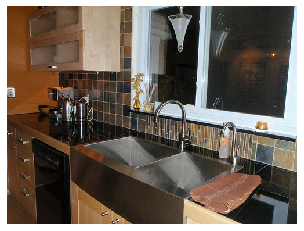

Image: orig_data/vqa_v2.0/val2014/COCO_val2014_000000229311.jpg
Original ques : How many spaces can you wash dishes in?
Original Answer : 2
Generated Logeq ques : can you count in this sink sink 1 sink
Generated Nec ques : can any dishes be sink in this bathroom
Generated Mutex ques : can you see 3 dishes       in the


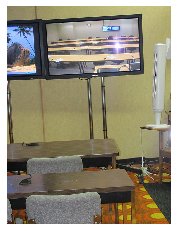

Image: orig_data/vqa_v2.0/val2014/COCO_val2014_000000437618.jpg
Original ques : What color is the carpet?
Original Answer : orange
Generated Logeq ques : is the carpet gray
Generated Nec ques : is there anything purple in the picture
Generated Mutex ques : is the carpet black


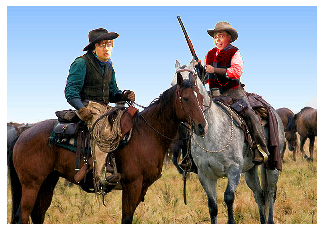

Image: orig_data/vqa_v2.0/val2014/COCO_val2014_000000493641.jpg
Original ques : What has been changed in this photo?
Original Answer : face
Generated Logeq ques : has the image been been taken in this photo
Generated Nec ques : is there a baseball in the picture
Generated Mutex ques : has the image been been taken in this photo


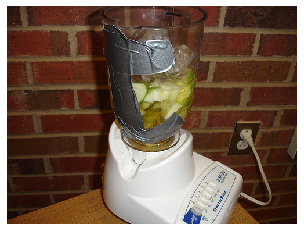

Image: orig_data/vqa_v2.0/val2014/COCO_val2014_000000519359.jpg
Original ques : What is fixing the blender?
Original Answer : tape
Generated Logeq ques : is the blender being thrown the blender
Generated Nec ques : is there a phone in the picture
Generated Mutex ques : is the blender being thrown       in the


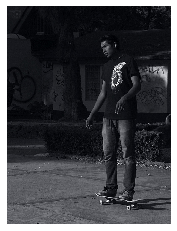

Image: orig_data/vqa_v2.0/val2014/COCO_val2014_000000160351.jpg
Original ques : How many gloves is the skateboarder wearing?
Original Answer : 0
Generated Logeq ques : is 1 hand the gloves
Generated Nec ques : is any gloves the man wearing
Generated Mutex ques : is 1 hand the gloves


In [91]:
for i in indices_bad:
    entry_1 = gq_1['annotations'][i]
    entry_2 = gq_2['annotations'][i]
    entry_3 = gq_3['annotations'][i]
#     ia = entry['imp_ans']
    oa = gq_1['ques_answers'][i]['orig_ans']
    q_1 = entry_1['gen_ques']
    q_1 = q_1.replace('<start>', '')
    q_1 = q_1.replace('<unk>', '')
    q_1 = q_1.replace('<end>', '')
    q_1 = q_1.strip()
    
    q_2 = entry_2['gen_ques']
    q_2 = q_2.replace('<start>', '')
    q_2 = q_2.replace('<unk>', '')
    q_2 = q_2.replace('<end>', '')
    q_2 = q_2.strip()
    
    q_3 = entry_3['gen_ques']
    q_3 = q_3.replace('<start>', '')
    q_3 = q_3.replace('<unk>', '')
    q_3 = q_3.replace('<end>', '')
    q_3 = q_3.strip()
    
    oq = imdb[i+1]['question_str']
    imgId = entry_1['image_id']
    imgFilename = 'orig_data/vqa_v2.0/val2014/' + 'COCO_val2014_'+ str(imgId).zfill(12) + '.jpg'
    
    if os.path.isfile(imgFilename):
        I = io.imread(imgFilename)
        plt.imshow(I)
        plt.axis('off')
        plt.show()
    print("Image: " + imgFilename)
    print("Original ques : " + oq)
    print("Original Answer : " + oa)
#     print("Implied Answer : " + ia)
    print("Generated Logeq ques : " + q_1)
    print("Generated Nec ques : " + q_2)
    print("Generated Mutex ques : " + q_3)